# Project on House Price Estimation

### Dataset Attributes

1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might
or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room 23: total_area: Measure of both living and lot

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(color_codes=True)

In [3]:
dataset = pd.read_csv('innercity.csv')

In [4]:
dataset.shape

(21613, 23)

In [5]:
dataset.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [6]:
dataset.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [7]:
#Lets extract year in which house was sold and convert its type to numeric and remove dayhours as it no longer needed
#as required information is extracted from this column.
dataset['yr_sold'] = dataset['dayhours'].str.slice(stop=4).astype('int64')

#As cid is a notation for a house, we don't need to feed it to our model, so along with dayhours, cid also need to be 
#removed from our dataset.

dataset.drop(['dayhours','cid'], axis=1, inplace=True)
dataset.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  yr_built  yr_renovated  zipcode      lat  \
0      0          5        9  ...      1956             0    98133  47.7174   
1      0          3        8  ...      1976             0    98023  47.3165   
2      0          3        8  ...      2006             0    98038  47.3515   
3      0          4        6  ...      1916             0    98133  47.7049   
4      0          4        8  ...      1954             0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  yr_sold  
0 -122.336              2120           7553          1       16477     2014  
1 -122.386              2260           8800          0       10050     2014  
2 -121.999              2370           4348          0        6694     2015  
3 -122.349              1520           3844          0        4664     2014  
4 -122.269              1900           5940          0        5450     2015  

[5 rows x 22 columns]

In [8]:
#Now once again check datatypes to make sure all of our features datatypes are numeric type.
dataset.dtypes

price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
yr_sold               int64
dtype: object

In [9]:
#Descriptive analysis to find out skewness, mean, median and five number summary
dataset.describe().T

count           mean            std         min  \
price             21613.0  540182.158793  367362.231718  75000.0000   
room_bed          21613.0       3.370842       0.930062      0.0000   
room_bath         21613.0       2.114757       0.770163      0.0000   
living_measure    21613.0    2079.899736     918.440897    290.0000   
lot_measure       21613.0   15106.967566   41420.511515    520.0000   
ceil              21613.0       1.494309       0.539989      1.0000   
coast             21613.0       0.007542       0.086517      0.0000   
sight             21613.0       0.234303       0.766318      0.0000   
condition         21613.0       3.409430       0.650743      1.0000   
quality           21613.0       7.656873       1.175459      1.0000   
ceil_measure      21613.0    1788.390691     828.090978    290.0000   
basement          21613.0     291.509045     442.575043      0.0000   
yr_built          21613.0    1971.005136      29.373411   1900.0000   
yr_renovated      21613.0      84.402258     401.679240      0.0000   
zipcode           21613.0   98077.939805      53.505026  98001.0000   
lat               21613.0      47.560053       0.138564     47.1559   
long              21613.0    -122.213896       0.140828   -122.5190   
living_measure15  21613.0    1986.552492     685.391304    399.0000   
lot_measure15     21613.0   12768.455652   27304.179631    651.0000   
furnished         21613.0       0.196687       0.397503      0.0000   
total_area        21613.0   17186.867302   41589.081215   1423.0000   
yr_sold           21613.0    2014.322954       0.467616   2014.0000   

                         25%          50%         75%           max  
price             321950.000  450000.0000  645000.000  7.700000e+06  
room_bed               3.000       3.0000       4.000  3.300000e+01  
room_bath              1.750       2.2500       2.500  8.000000e+00  
living_measure      1427.000    1910.0000    2550.000  1.354000e+04  
lot_measure         5040.000    7618.0000   10688.000  1.651359e+06  
ceil                   1.000       1.5000       2.000  3.500000e+00  
coast                  0.000       0.0000       0.000  1.000000e+00  
sight                  0.000       0.0000       0.000  4.000000e+00  
condition              3.000       3.0000       4.000  5.000000e+00  
quality                7.000       7.0000       8.000  1.300000e+01  
ceil_measure        1190.000    1560.0000    2210.000  9.410000e+03  
basement               0.000       0.0000     560.000  4.820000e+03  
yr_built            1951.000    1975.0000    1997.000  2.015000e+03  
yr_renovated           0.000       0.0000       0.000  2.015000e+03  
zipcode            98033.000   98065.0000   98118.000  9.819900e+04  
lat                   47.471      47.5718      47.678  4.777760e+01  
long                -122.328    -122.2300    -122.125 -1.213150e+02  
living_measure15    1490.000    1840.0000    2360.000  6.210000e+03  
lot_measure15       5100.000    7620.0000   10083.000  8.712000e+05  
furnished              0.000       0.0000       0.000  1.000000e+00  
total_area          7035.000    9575.0000   13000.000  1.652659e+06  
yr_sold             2014.000    2014.0000    2015.000  2.015000e+03

- In price attribute which is our target variable, mean > median, so it is right skewed in nature.
- In lot_measure, there is a huge difference in mean and median, as mean > median it is said to be __right skewed__ in nature and Standard Deviation is also much more than mean value. There could be reason of potential outlier behind it.
- In coast & sight attribute, standard deviation is greater than mean value. It is indicating that data is __widely spread out__.
- yr_renovated has high difference in mean and median, as standard deviation is higher than mean, it is indication of __wide spread of data__.
- lot_measure15 has mean > median, it is indication of right skewed in nature. It is also __widely spread__ as Standard Deviation is > mean.
- In furnished attribute also std > mean.
- total_area is also right skewed, it is also __widely spread__.

In [10]:
#Check for how many houses are renovated
len(dataset[dataset.yr_renovated != 0]), len(dataset), (len(dataset[dataset.yr_renovated != 0])/len(dataset)) * 100

(914, 21613, 4.228936288344977)

    Out of 21613 records, only 914 are renovated. Almost 4.23% of whole dataset contains renovated house.

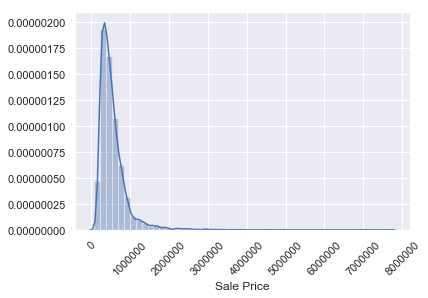

In [11]:
#Check sale-price distribution
sns.distplot(dataset['price'])
plt.xticks(rotation=45)
plt.xlabel('Sale Price')
plt.show()

In [12]:
dataset['price'].min(), dataset['price'].max()

(75000, 7700000)

    We can clearly see most of the sale price lies in between 75000 to 20 lacs

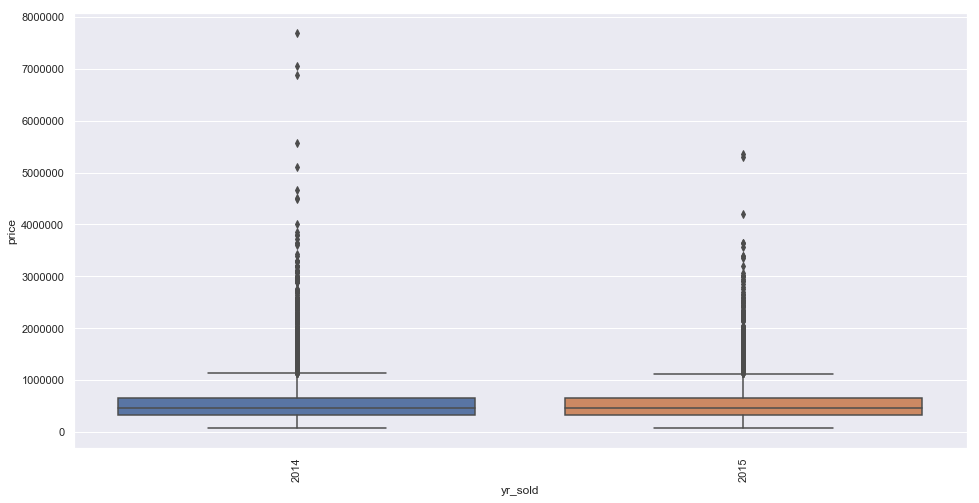

In [13]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='yr_sold', y="price", data=dataset)
plt.xticks(rotation=90);

Year sold 2014 have more data than 2015.

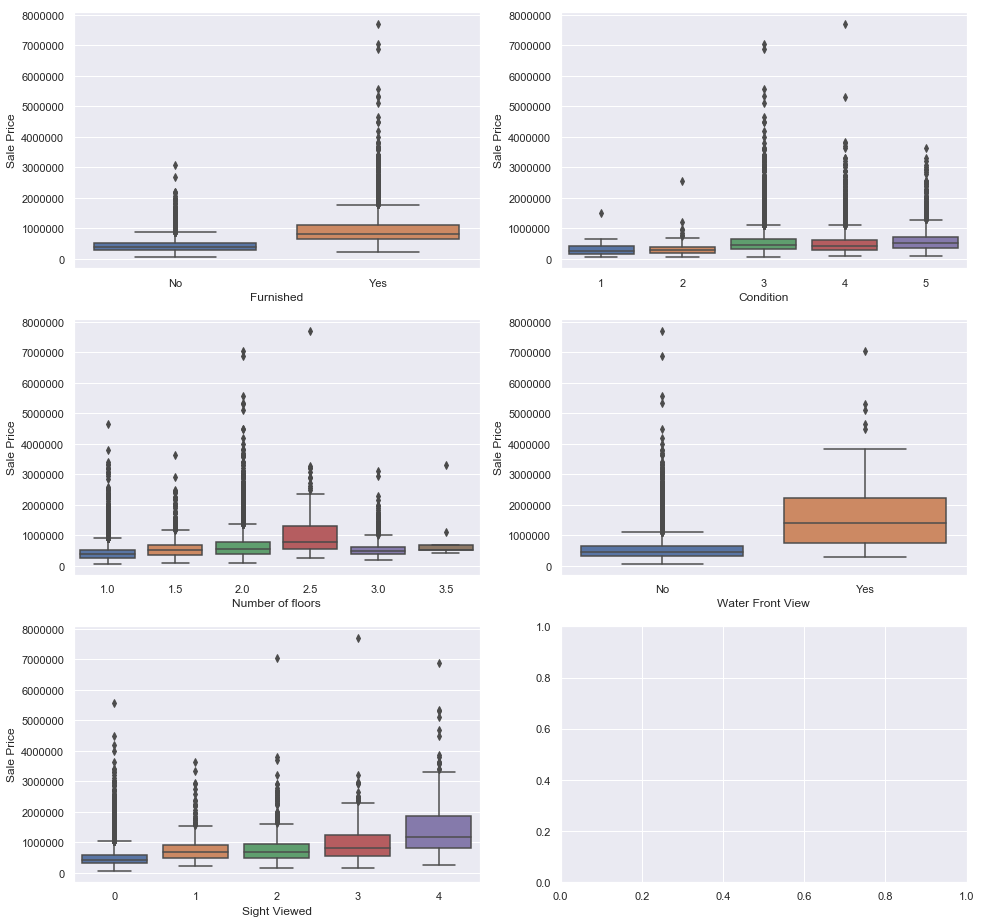

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(16,16))

#Sale price by Furnished and Non Furnished houses
sns.boxplot(x='furnished', y="price", data=dataset, ax=axes[0,0]).set(
    xlabel='Furnished', 
    ylabel='Sale Price',
    xticklabels=['No','Yes']
)

#Sale price by condition rated.
sns.boxplot(x='condition', y="price", data=dataset, ax=axes[0,1]).set(
    xlabel='Condition', 
    ylabel='Sale Price'
)

#Sale price by number of floors
sns.boxplot(x='ceil', y="price", data=dataset, ax=axes[1,0]).set(
    xlabel='Number of floors', 
    ylabel='Sale Price'
)

#Sale price by Water Front View
sns.boxplot(x='coast', y="price", data=dataset, ax=axes[1,1]).set(
    xlabel='Water Front View', 
    ylabel='Sale Price',
    xticklabels=['No','Yes']
)

#Sale price by Sight Viewed or Not
sns.boxplot(x='sight', y="price", data=dataset, ax=axes[2,0]).set(
    xlabel='Sight Viewed', 
    ylabel='Sale Price'
)

plt.show()

- We have visualised dataset by various categorical variable and found lot of outliers almost in every category.
- For furnished house, there are high prices.
- Condition 3 and above have high price range.
- Number of floor 2 & 2.5 have high price range.
- Water Front View (coast) has higher price.
- Sight not viewed have more records than any of the other but sight viewed 4 times have more concentration of data.

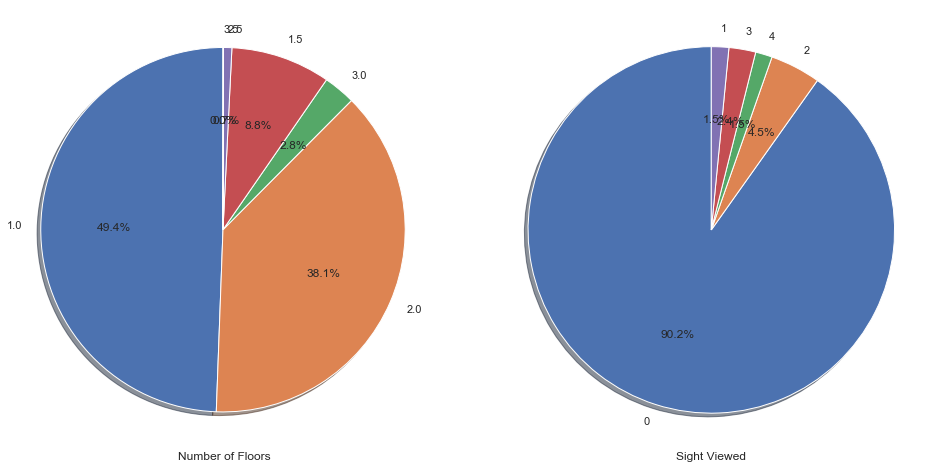

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

ceil_labels = dataset['ceil'].unique()
sgt_labels = dataset['sight'].unique()

ceil_sizes = []
sgt_sizes = []

for lbl in ceil_labels:
    size = len(dataset[dataset['ceil'] == lbl]) / len(dataset)
    ceil_sizes.append(size * 100)

for lbl in sgt_labels:
    size = len(dataset[dataset['sight'] == lbl]) / len(dataset)
    sgt_sizes.append(size * 100)
    

axes[0].pie(ceil_sizes, labels=ceil_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_xlabel('Number of Floors');


axes[1].pie(sgt_sizes, labels=sgt_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_xlabel('Sight Viewed');

plt.show()

- In terms of Number of floors, most of the houses are of __single & double__ floor 
- In terms of Sight Viewed, almost 90% of the time sight is not viewed. And maximum number of sight viewed is 4 times.

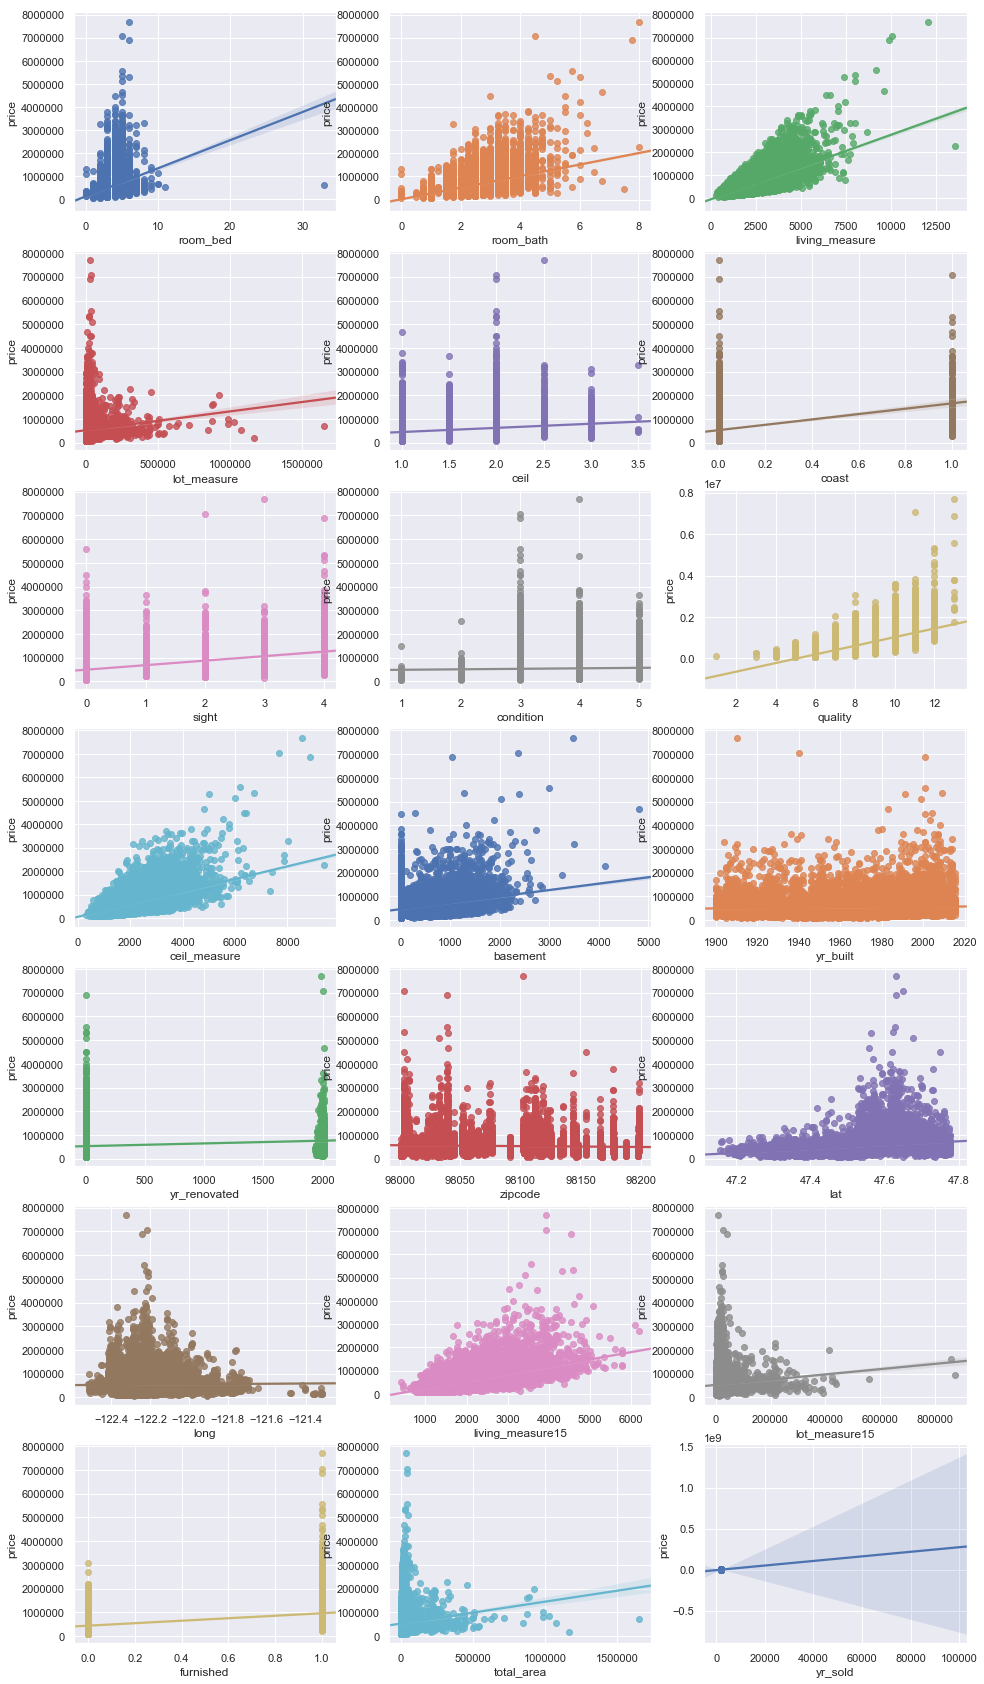

In [16]:
#checking out linear relation with target variable, finding out strong predictors of target variable.

def plotReg(indCol, targetCol, axis):
    sns.regplot(dataset[indCol], dataset[targetCol], ax=axis)

fig, axes = plt.subplots(7, 3, figsize=(16,30))

y = dataset['price']
X = dataset.drop(['price'], axis=1)

features = X.columns

plotReg(features[0], 'price', axes[0,0])
plotReg(features[1], 'price', axes[0,1])
plotReg(features[2], 'price', axes[0,2])
plotReg(features[3], 'price', axes[1,0])
plotReg(features[4], 'price', axes[1,1])
plotReg(features[5], 'price', axes[1,2])
plotReg(features[6], 'price', axes[2,0])
plotReg(features[7], 'price', axes[2,1])
plotReg(features[8], 'price', axes[2,2])
plotReg(features[9], 'price', axes[3,0])
plotReg(features[10], 'price', axes[3,1])
plotReg(features[11], 'price', axes[3,2])

plotReg(features[12], 'price', axes[4,0])
plotReg(features[13], 'price', axes[4,1])
plotReg(features[14], 'price', axes[4,2])
plotReg(features[15], 'price', axes[5,0])
plotReg(features[16], 'price', axes[5,1])
plotReg(features[17], 'price', axes[5,2])
plotReg(features[18], 'price', axes[6,0])
plotReg(features[19], 'price', axes[6,1])
plotReg(features[20], 'price', axes[6,2])

   Out of so many features we have, some of the attributes are strong predictors, some showing a little weak relation and rest are just parallel lines. Some of the strong predictors are listed below:
   
   - room_bed
   - room_bath
   - living_measure
   - lot_measure
   - coast
   - sight
   - quality
   - ceil measure
   - basement
   - living_measure15
   - lot_measure15
   - furnished 
   - total_area

### Correlations

In statistics, Spearman's rank correlation coefficient or Spearman's rho, named after Charles Spearman and often denoted by the Greek letter $\rho$ (rho) or as $r_{s}$, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

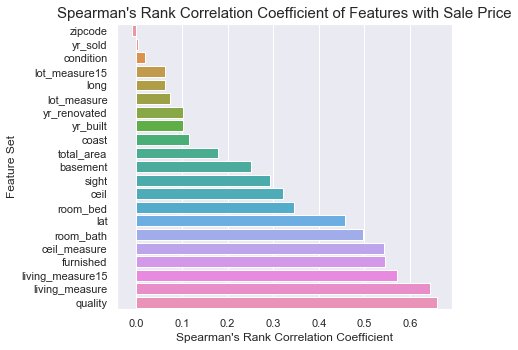

In [17]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

spearman(dataset, features)
plt.title('Spearman\'s Rank Correlation Coefficient of Features with Sale Price', fontdict={'fontsize':15})
plt.xlabel('Spearman\'s Rank Correlation Coefficient')
plt.ylabel('Feature Set')
plt.show()

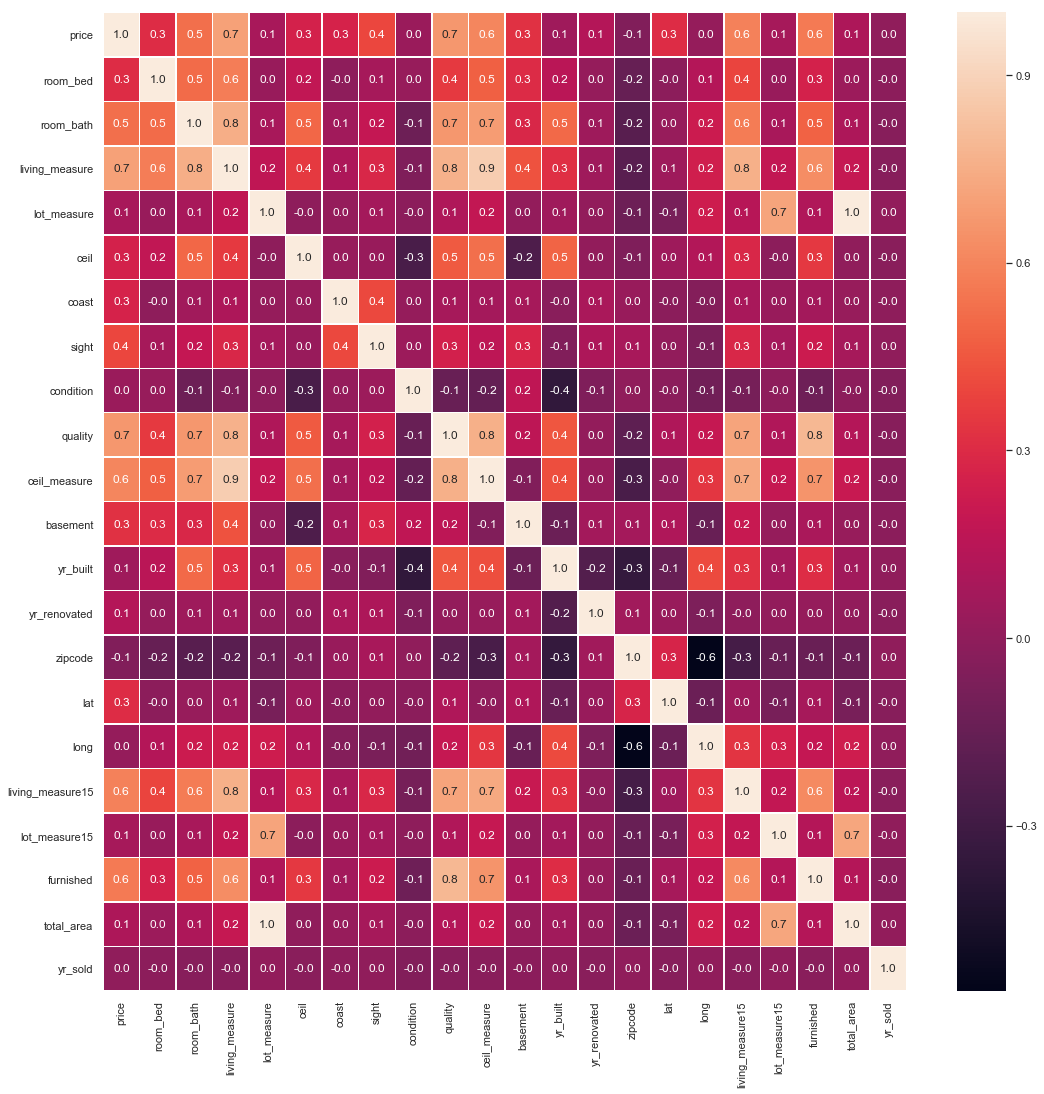

In [18]:
#Visualise correlaton matrix 
corrmatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(corrmatrix, annot=True, linewidths=.5, ax=ax, fmt='0.1f')
plt.show()

###  We need to check whether independent variable are interacting with each other or not. For that we will use pair plot to check 

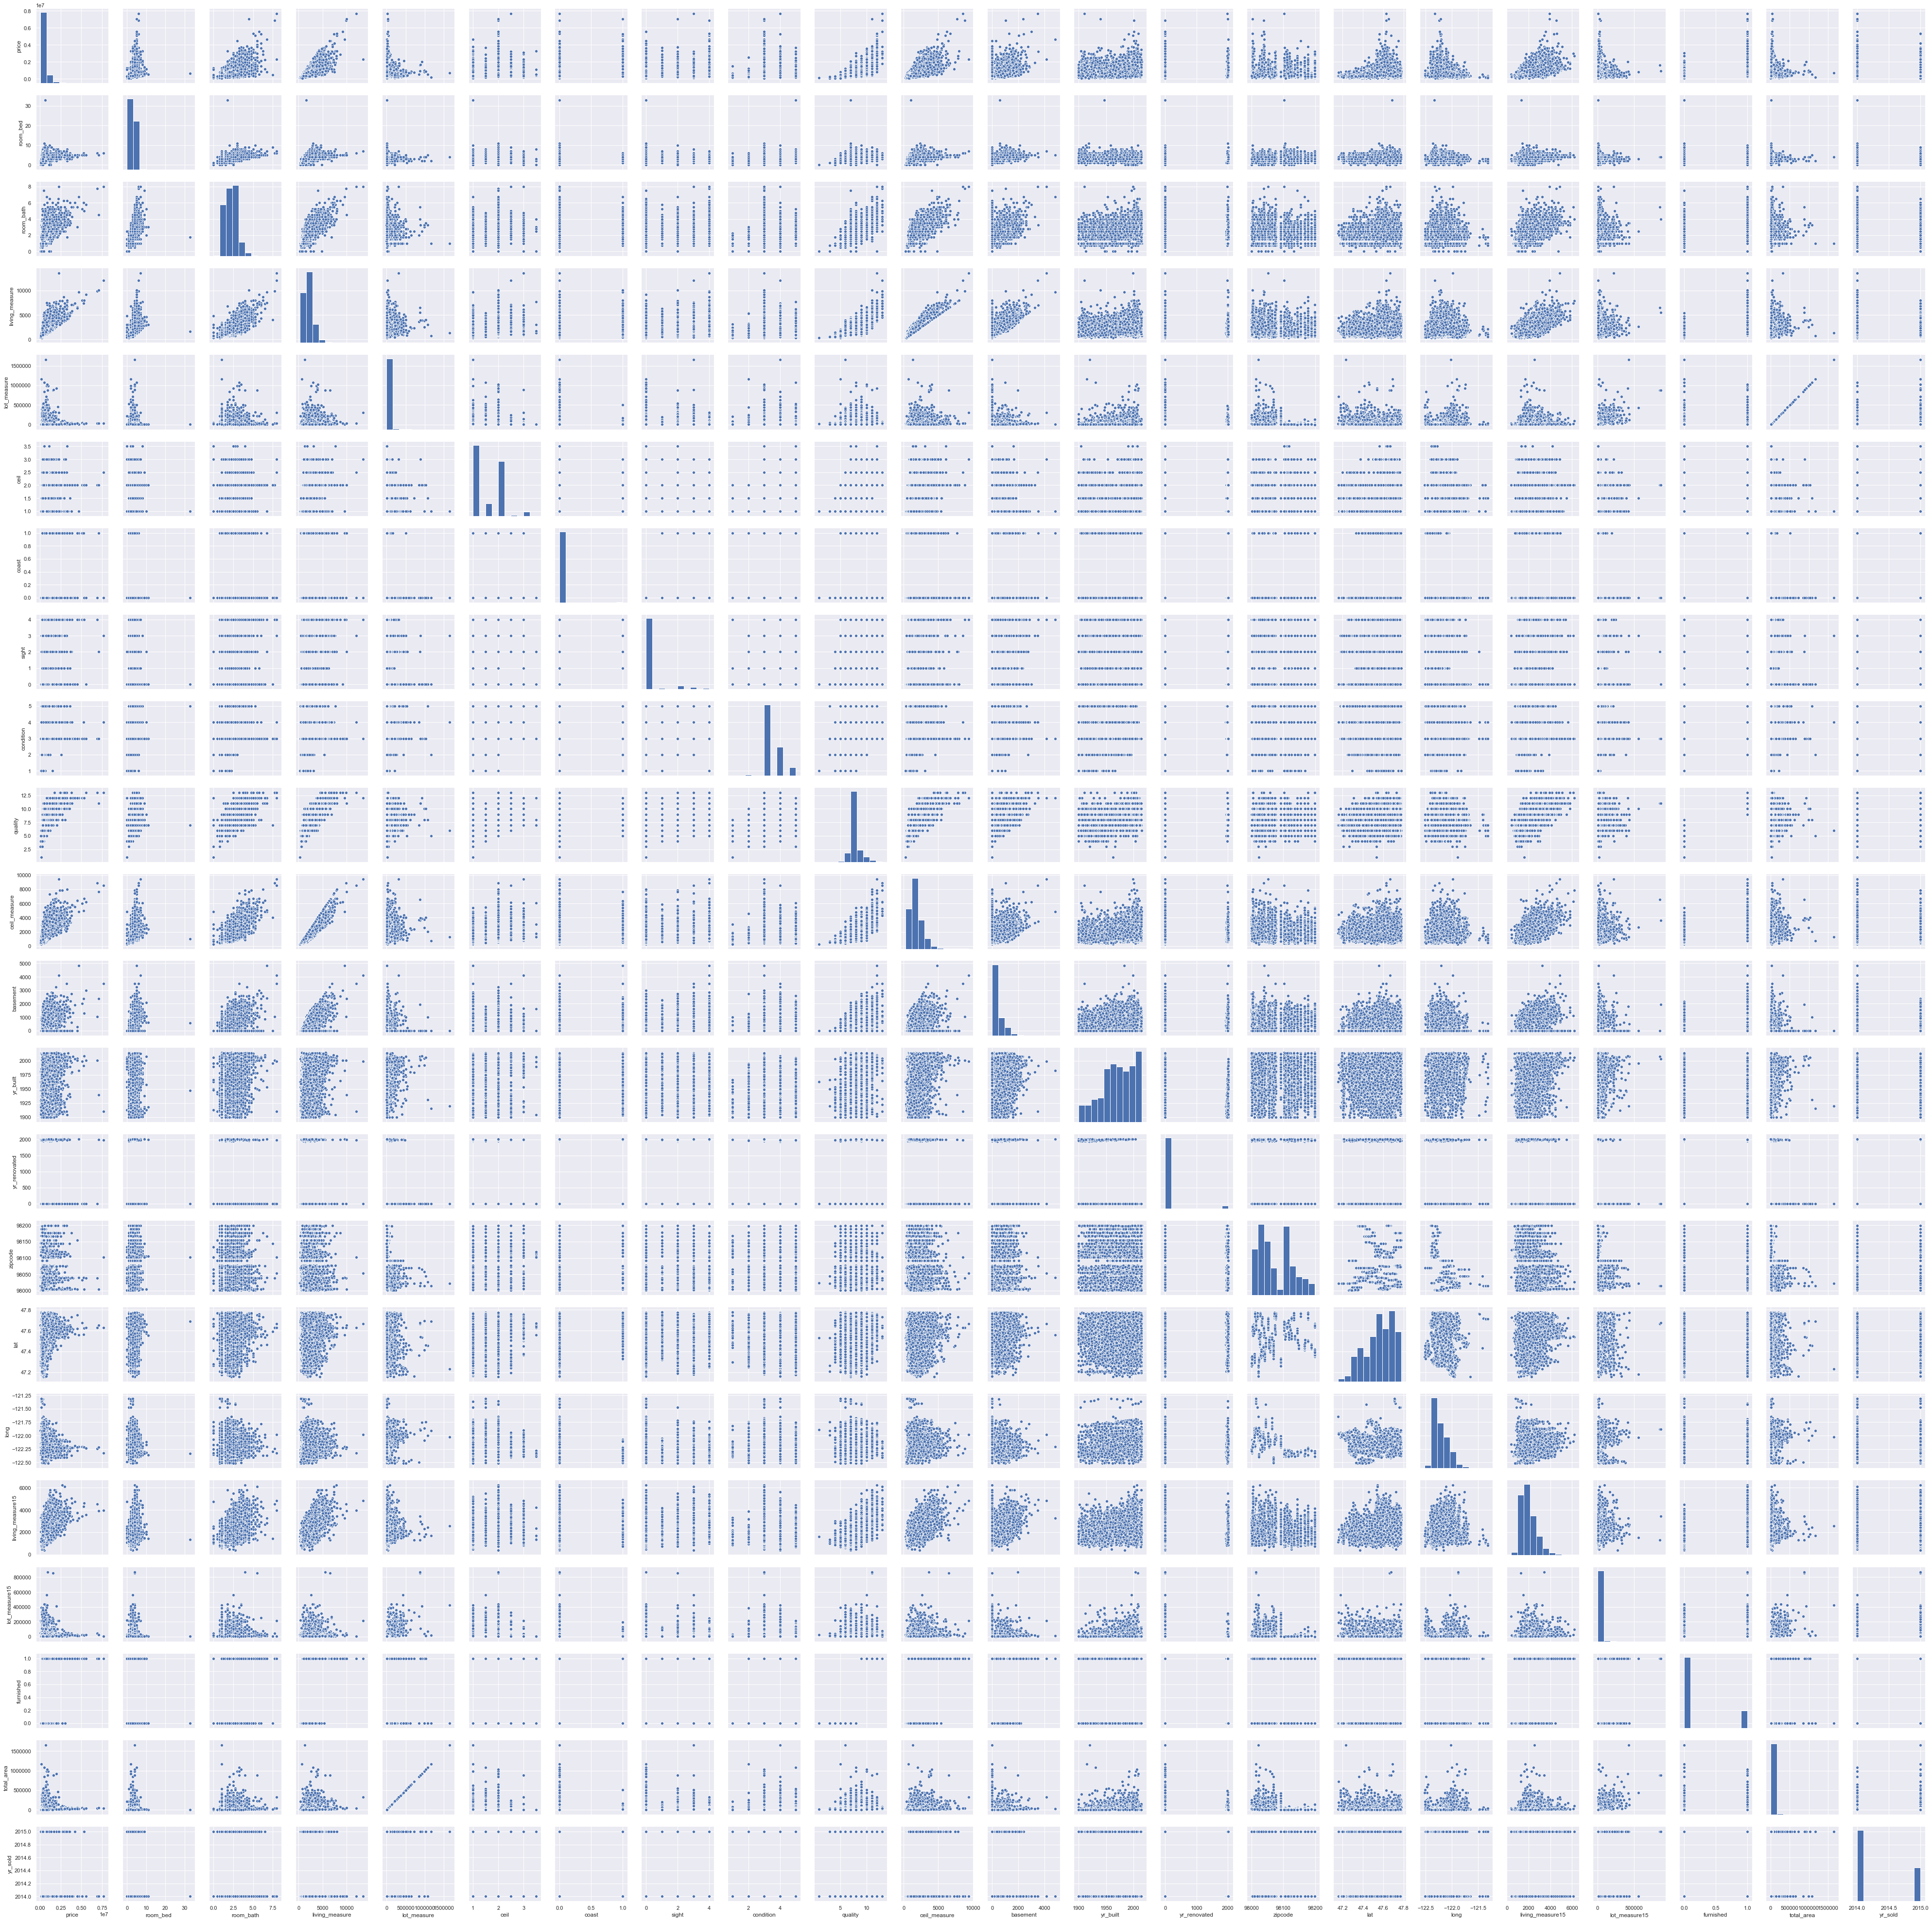

In [19]:
sns.pairplot(dataset)
plt.show()

## Pre-processing

In order to run our models on the data, I had to transform many of the variables. The following pre-processing steps were taken:

- Removing outliers: the classic Tukey method of taking 1.5 * IQR to remove outliers removed too much data. I therefore removed values that were outside of 3 * IQR instead.

- Filling NaN values: As there are no null values found in our dataset, so need to handle it.

- Created dummy variables for the categorical variables.

- Split the data into a training set and a test set

- Scaled the data